# CCBM 2023 Summer Programming Workshop
# Day 7 - Segment 2, 3
## Topics:
- What is Data Science?
- Introduction to pandas for Data Science
    - Importing data
    - Data exploration
- Data visualization
    - basic plots in pandas
    - Examples in matplotlib and seaborn
- Mini-challenge using pandas in Jupyter Notebook

## Objectives:
- Create a Jupyter Notebook
- Create a DataFrame object from a dictionary, and .csv, and .xlsx files
- Evaluate the DataFrame
- Basic plotting with matplotlib and seaborn


Credits:  This Jupyter Notebook was created by Dr. Ngoc Tran for use in the CCBM Summer Programming Workshop

## What is Data Science?

- extraction of information from data to form insight. 
- involves manipulating and applying statistics to data to make decisions.


### What Do Data Scientists Do?
A day in the life of a data scientist varies depending on industry/field. A data scientist can be expected to:
- conduct research to identify pain points, opportunities for improving productivity and growth 
- define relevant data sets, and collect or extract them from various resources (data acquisition)
- manipulate, organize and validate data sets (data preparation (data cleaning and data transformation))
- analyze data to identify patterns and trends (exploratory data analysis (EDA))
- design machines that can automate output based on data (data modeling or machine learning)
- communicate findings to stakeholders
    - create visualisations (descriptive analytics)
- deploy and maintain the model

<br>
<div>
    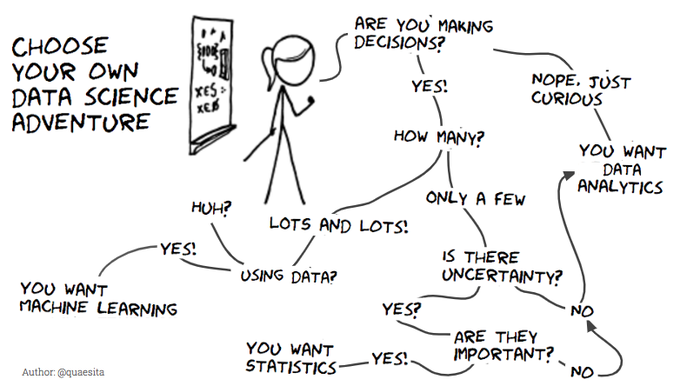
<div>
    <center> https://twitter.com/quaesita/status/1107642562830106625 </center>
<br>
    


### Job prospects
Data science careers are no longer limited to FAANG. Data is ubiquitous. In 2020, we created 2.5 quintillion data bytes a day. This is equivalent to 2.5 x 10$^1$$^8$ bytes of data daily!$^1$ In 2021, it's estimated that humans consumed 79 zettabytes of data. This is equivalent to 79 x 10$^2$$^1$ bytes of data!$^2$ 

The demand for data-driven decision making is still high. Creating insight from data is prevalent in almost every industry. Data science experts are needed in almost every field, from identifying images of trafficking victims on-line (Thorn) and fraud detection (banking, retail) to increasing agricultural productivity through digital farming (Bayer, IBM, Farmers Edge), and identifying factors that influence employee turnover.

https://techjury.net/blog/how-much-data-is-created-every-day/#gref$^1$
<br>

## Introduction to pandas for Data Science
### What is pandas?

pandas is a free, open source Python library "for doing practical, real world data analysis in Python."$^2$ It is used for reading, cleaning, exploring, analyzing and visualizing tabular data.

pandas is a free, open source Python library "for doing practical, real world data analysis in Python."$^2$ It is used for reading, cleaning, exploring, analyzing, and visualizing tabular data.

Dataframe:
- a standard pandas data structure
- made up of a combination of column vectors or two-dimensional arrays
- can store multiple data types:
    - string
    - integer
    - float
    - boolean
    - time series data (date-time values, differences between date-times)

DataFrames can be created from a dictionary of column vectors where the keys are column labels and the values are the vectors. Let's create a dataframe from a dictionary of "student graduation" data for five (5) students where the columns are:
- "Student ID"
- "Degree or Major"
- "GPA"
- "Graduated"

https://pandas.pydata.org/about/index.html

In [1]:
# Start by importing the required library/libraries

import pandas as pd
import random

In [2]:
# Generate Student IDs and GPAs columns using Python's random library

student_ids = [random.randint(1000, 2500) for idx in range(5)]
gpas = [round(random.uniform(1.4, 4.0), 2) for idx in range(5)]
student_ids, gpas

([2209, 1006, 1853, 1187, 2293], [2.93, 1.98, 2.56, 3.4, 3.78])

In [3]:
# Use student GPAs to determine if student graduated. 

graduated = ["Y" if ele > 2.0 else "N" for ele in gpas]
graduated

['Y', 'N', 'Y', 'Y', 'Y']

In [4]:
# Manually create a dictionary

sample_dict = {
    "Student ID": student_ids,
    "Degree or Major": ["Biology", "History", "Undeclared", "Chemistry", "Cognitive Science"],
    "GPA": gpas,
    "Graduated": graduated
}

sample_dict

{'Student ID': [2209, 1006, 1853, 1187, 2293],
 'Degree or Major': ['Biology',
  'History',
  'Undeclared',
  'Chemistry',
  'Cognitive Science'],
 'GPA': [2.93, 1.98, 2.56, 3.4, 3.78],
 'Graduated': ['Y', 'N', 'Y', 'Y', 'Y']}

In [5]:
# Convert the dictionary to a pandas DataFrame

sample_df = pd.DataFrame.from_dict(sample_dict)
sample_df

Student ID    Degree or Major   GPA Graduated
0        2209            Biology  2.93         Y
1        1006            History  1.98         N
2        1853         Undeclared  2.56         Y
3        1187          Chemistry  3.40         Y
4        2293  Cognitive Science  3.78         Y

In [6]:
# Confirm a dataframe was created successfully

type(sample_df)

pandas.core.frame.DataFrame

### DataFrame versus Series

A pandas dataframe object can be thought of as a spreadsheet or table with rows and columns, whereas a pandas Series object consists of a single column. A pandas DataFrame can be subset using dot or bracket notation to obtain a Series object. Subsetting multiple columns in a DataFrame is also done using bracket notation. Subsetting rows and columns requires the use of .loc and .iloc.

In [7]:
# Subset one column in the DataFrame using bracket notation to obtain a pandas Series object.
# Bracket notation will always work.
sample_series = sample_df["GPA"]

sample_series
type(sample_series)

# Another way to subset column data is dot notation, but this may not always work. 
# The column title or label must not have spaces.
sample_srs = sample_df.Graduated

sample_srs
type(sample_srs)

# Subsetting for the column variable "Degree or Major" in the sample_df using dot notation
# returns an error
# subset_df = sample_df.Degree or Major

# Subsetting using bracket notation will always work
subset_df = sample_df["Degree or Major"]
subset_df

0              Biology
1              History
2           Undeclared
3            Chemistry
4    Cognitive Science
Name: Degree or Major, dtype: object

In [8]:
sample_srs = sample_df.Graduated

sample_srs
#type(sample_srs)

0    Y
1    N
2    Y
3    Y
4    Y
Name: Graduated, dtype: object

In [9]:
# Subset multiple columns with a list in double brackets

subset_multiple = sample_df[["Degree or Major", "GPA", "Graduated"]]
subset_multiple

Degree or Major   GPA Graduated
0            Biology  2.93         Y
1            History  1.98         N
2         Undeclared  2.56         Y
3          Chemistry  3.40         Y
4  Cognitive Science  3.78         Y

In [10]:
# Slice the first four rows in the dataframe using square bracket notation
sample_df[:4]

# See the difference when using .loc? .loc is label-based
sample_df.loc[:4]

# Subsetting the 2nd & 4th rows using square bracket notation like this will throw an error
# sample_df[1,3]
# sample_df[[1,3]]

# Can use .loc or .iloc to select observations from the 2nd & 4th rows
sample_df.loc[[1,3]]
# sample_df.iloc[[1,3]]

# Can use .loc[row, column] or .iloc[row, column] select observations from the 2nd & 4th rows
# sample_df.loc[[1,3], :]
sample_df.iloc[[1,3], :]

# Select the Student ID, Major and graduation status columns for the 2nd & 4th students in the data set
# Not recommended. Can be confusing since it is hard to keep track of features
sample_df.iloc[[1,3], [0,1,3]]

# Select the same rows and columns using .loc using feature names
# Recommended since features and rows used are explicit
sample_df.loc[[1,3], ["Student ID", "Degree or Major", "Graduated"]]

# Another advantage of .loc is that it can accept boolean data.
# Use .loc to filter students with a GPA >= 2.0
sample_df.loc[sample_df["GPA"] >= 2.0]

Student ID    Degree or Major   GPA Graduated
0        2209            Biology  2.93         Y
2        1853         Undeclared  2.56         Y
3        1187          Chemistry  3.40         Y
4        2293  Cognitive Science  3.78         Y

In [11]:
sample_df.loc[[1,3]]

Student ID Degree or Major   GPA Graduated
1        1006         History  1.98         N
3        1187       Chemistry  3.40         Y

## Hands-on data exploration with pandas

Earlier in the course, we used standard Python commands 
- input()
- file.readline() 

to read in individual values or lines of data. When working with data, we are often reading in whole files of data that is organized in a defined format. pandas can load a number of different file types into a dataframe:
- Excel
- SQL
- JSON
- HTML
- delimiters (csv, tsv, psv)
- plain text
- and more...


Let's take a closer look at how to load a CSV file into a pandas dataframe and perform a basic analysis on it.
<br></br>
Start by importing the required library/libraries. This step is usually done in the very first cell of a notebook.

In [12]:
# Import libraries

import pandas as pd

In [13]:
# Determine current working directory

# Can still use:
import os
os.getcwd()

# !dir shows the current directory and the files in that directory
!dir

 Volume in drive C is OS
 Volume Serial Number is 3624-5EF1

 Directory of C:\Users\mcolv\OneDrive - University of California Merced\Teaching\CCBM Summer Programming 2023\repos_2023\ccbm2023day7

07/18/2023  07:30 PM    <DIR>          .
07/15/2023  05:28 PM    <DIR>          ..
07/17/2023  09:19 PM    <DIR>          .git
07/18/2023  07:30 PM    <DIR>          .ipynb_checkpoints
07/17/2023  09:10 PM    <DIR>          data
07/16/2023  09:48 PM           491,233 Day 7 Section 1 Stochastic Examples.ipynb
07/17/2023  09:08 PM         8,543,151 Day 7 Section 2 PandasLecture.ipynb
07/17/2023  07:05 PM         6,053,255 Day 7 Section 2 PandasLecture_and_Solutions.ipynb
07/16/2023  11:26 AM    <DIR>          img
               3 File(s)     15,087,639 bytes
               6 Dir(s)  18,797,158,400 bytes free


### Read a CSV file
We will be working with the dataset, "student_dataset2.csv"

**Reminder**: In Jupyter Notebooks, the last object in an executed cell automatically prints to the screen.

In [14]:
# Create a pandas dataframe from a CSV file using pd.read_csv

# Notice unnamed rows in the file
# sd = pd.read_csv("data/student_dataset2.csv")

# Use skiprows parameter to trim the first three rows from the dataset
sd = pd.read_csv("data/student_dataset2.csv", skiprows=3)

sd

ID            Major  HighSchoolGPA  SATScores AppliedtoanotherUC  \
0     281796     Anthropology           3.81       1020                Yes   
1      73334     Anthropology           3.62        690                Yes   
2     270078     Anthropology           3.80        900                 No   
3     197784     Anthropology           3.72        790                Yes   
4     218180     Anthropology           3.75        860                Yes   
...      ...              ...            ...        ...                ...   
2742   78234  Undeclared SSHA           3.60       1070                Yes   
2743  260092  Undeclared SSHA           3.09        930                 No   
2744  229588  Undeclared SSHA           3.76        900                 No   
2745  175542  Undeclared SSHA           3.70        890                Yes   
2746   66594  Undeclared SSHA           2.46       1120                Yes   

     AdmittedtoanotherUC FirstGeneration Gender  TotalHSHonorsCoursesTaken  \
0                    Yes             Yes      M                          0   
1                    Yes              No      F                          6   
2                     No             Yes      F                          0   
3                    Yes              No      F                          0   
4                    Yes              No      F                         12   
...                  ...             ...    ...                        ...   
2742                 Yes             Yes      F                          8   
2743                  No              No      M                          7   
2744                  No              No      F                          8   
2745                 Yes             Yes      F                          9   
2746                 Yes              No      M                          0   

      MathPlacementScore FirstMathClassGrade  @1stSemesterGPA Retained1stYear  \
0                      7                   C             1.10               N   
1                      5                   I             1.88               Y   
2                      7                   C             1.90               N   
3                      8                   F             1.90               N   
4                      5                   D             1.90               Y   
...                  ...                 ...              ...             ...   
2742                   6                  A+             3.50               Y   
2743                   6                   W             3.50               Y   
2744                   5                  A-             3.54               N   
2745                   6                  A+             3.60               Y   
2746                   5                   W             4.00               Y   

     Graduated  
0           No  
1           No  
2           No  
3           No  
4          Yes  
...        ...  
2742       Yes  
2743       Yes  
2744        No  
2745       Yes  
2746        No  

[2747 rows x 14 columns]

What we see doesn't make sense. We have columns named "Unnamed: 1", "Unnamed: 2", "Unnamed: 2", etc. Let's open the CSV file in MS Excel or some other spreadsheet program to examine the cause of this output.
<br>

You can see that the first THREE (3) rows contain some explanatory text that do not contribute to the analysis. We can omit those rows using the parameter, **skiprows**.

**Nota Bene**: 
- Clicking **`SHIFT`** + **`TAB`** + **`TAB`** in between the parentheses of a function will list all the parameters of that function in detail.
- Clicking **`TAB`** after the "." will list the functions associated with that library.
<br></br>

### Data Exploration
#### Get acquainted with the dataframe

The first tool for data exploration is **.head()**, which displays the first five (5) rows of the dataframe by default. Conversely, **.tail()** displays the last five (5) rows of the dataframe. The number of rows displayed can be specified by entering an integer value in parentheses. Let's preview this dataframe by displaying the first and last five rows.

In [15]:
# Call .head() and .tail()

display(sd.head())
sd.tail()

ID         Major  HighSchoolGPA  SATScores AppliedtoanotherUC  \
0  281796  Anthropology           3.81       1020                Yes   
1   73334  Anthropology           3.62        690                Yes   
2  270078  Anthropology           3.80        900                 No   
3  197784  Anthropology           3.72        790                Yes   
4  218180  Anthropology           3.75        860                Yes   

  AdmittedtoanotherUC FirstGeneration Gender  TotalHSHonorsCoursesTaken  \
0                 Yes             Yes      M                          0   
1                 Yes              No      F                          6   
2                  No             Yes      F                          0   
3                 Yes              No      F                          0   
4                 Yes              No      F                         12   

   MathPlacementScore FirstMathClassGrade  @1stSemesterGPA Retained1stYear  \
0                   7                   C             1.10               N   
1                   5                   I             1.88               Y   
2                   7                   C             1.90               N   
3                   8                   F             1.90               N   
4                   5                   D             1.90               Y   

  Graduated  
0        No  
1        No  
2        No  
3        No  
4       Yes

ID            Major  HighSchoolGPA  SATScores AppliedtoanotherUC  \
2742   78234  Undeclared SSHA           3.60       1070                Yes   
2743  260092  Undeclared SSHA           3.09        930                 No   
2744  229588  Undeclared SSHA           3.76        900                 No   
2745  175542  Undeclared SSHA           3.70        890                Yes   
2746   66594  Undeclared SSHA           2.46       1120                Yes   

     AdmittedtoanotherUC FirstGeneration Gender  TotalHSHonorsCoursesTaken  \
2742                 Yes             Yes      F                          8   
2743                  No              No      M                          7   
2744                  No              No      F                          8   
2745                 Yes             Yes      F                          9   
2746                 Yes              No      M                          0   

      MathPlacementScore FirstMathClassGrade  @1stSemesterGPA Retained1stYear  \
2742                   6                  A+             3.50               Y   
2743                   6                   W             3.50               Y   
2744                   5                  A-             3.54               N   
2745                   6                  A+             3.60               Y   
2746                   5                   W             4.00               Y   

     Graduated  
2742       Yes  
2743       Yes  
2744        No  
2745       Yes  
2746        No

Other functions to assess the layout of the dataframe include:
- .shape returns a tuple of the dimensions or the number of (rows, columns) in the DataFrame.
- .dtypes gives a series object of data types pandas has assigned to each variable or feature in the DataFrame.
- .info() returns a pandas DataFrame object containing a summary of the called DataFrame. It lists the columns, column dtypes, number of columns, range index (number of rows), and null_counts/non-null counts.

In [16]:
# Call .shape on your dataframe
sd.shape

# Call .dtypes
sd.dtypes

# Check that the result of the call is a series object
type(sd.dtypes)

pandas.core.series.Series

In [17]:
# Call .info() 
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2747 non-null   int64  
 1   Major                      2747 non-null   object 
 2   HighSchoolGPA              2747 non-null   float64
 3   SATScores                  2747 non-null   int64  
 4   AppliedtoanotherUC         2747 non-null   object 
 5   AdmittedtoanotherUC        2747 non-null   object 
 6   FirstGeneration            2747 non-null   object 
 7   Gender                     2747 non-null   object 
 8   TotalHSHonorsCoursesTaken  2747 non-null   int64  
 9   MathPlacementScore         2747 non-null   int64  
 10  FirstMathClassGrade        2747 non-null   object 
 11  @1stSemesterGPA            2747 non-null   float64
 12  Retained1stYear            2747 non-null   object 
 13  Graduated                  2747 non-null   objec

#### Summary statistics of a dataframe

To get a better understanding of the data set, you can generate a quantitative summary of a variable and its data points.

- .describe() returns a pandas DataFrame object containing general statistical data of the numerical values in the DataFrame columns
- .value_counts() returns a series object counting all the unique values in descending order

In [18]:
# Call .describe()
sd.describe()

ID  HighSchoolGPA    SATScores  TotalHSHonorsCoursesTaken  \
count    2747.000000    2747.000000  2747.000000                2747.000000   
mean   150348.588278       3.452636   970.560612                   3.892610   
std     71901.267292       0.402185   163.063954                   4.872419   
min     13304.000000       2.300000   530.000000                   0.000000   
25%     78166.000000       3.110000   870.000000                   0.000000   
50%    148420.000000       3.620000   960.000000                   0.000000   
75%    202273.000000       3.700000  1080.000000                   8.000000   
max    285358.000000       4.220000  1590.000000                  53.000000   

       MathPlacementScore  @1stSemesterGPA  
count         2747.000000      2747.000000  
mean             5.622861         2.645606  
std              2.571716         0.588213  
min              1.000000         1.000000  
25%              3.000000         2.250000  
50%              6.000000         2.700000  
75%              8.000000         3.100000  
max             10.000000         4.000000

In [19]:
# Can also call .min(), .max() on series data

sd.TotalHSHonorsCoursesTaken.min(), sd.TotalHSHonorsCoursesTaken.max()
sd["SATScores"].min(), sd["SATScores"].max()

# As well as .mean(), .std(), .median() and .mode()
sd["@1stSemesterGPA"].mean(), sd["@1stSemesterGPA"].std()
sd["@1stSemesterGPA"].median()
sd["@1stSemesterGPA"].mode()

0    2.25
Name: @1stSemesterGPA, dtype: float64

In [77]:
# Call .value_counts() on a series in the DataFrame
sd.value_counts("@1stSemesterGPA")

# Call .value_counts() on a series in the DataFrame
sd.value_counts("Major")

# Call .value_counts() on the DataFrame
sd.value_counts()

# Call .value_counts() on a subset of the DataFrame
a=sd.value_counts(["Major", "Gender", "Graduated"])
sd

ID            Major  HighSchoolGPA  SATScores AppliedtoanotherUC  \
0     281796     Anthropology           3.81       1020                Yes   
66    213900     Anthropology           3.75        770                 No   
65    205710     Anthropology           3.73       1030                Yes   
64     92926     Anthropology           3.62       1090                Yes   
63     87962     Anthropology           3.61        950                 No   
...      ...              ...            ...        ...                ...   
2640  109318  Undeclared SSHA           3.63        920                Yes   
2641   77150  Undeclared SSHA           2.45        960                Yes   
2642  143604  Undeclared SSHA           2.85        990                Yes   
2624   60804  Undeclared SSHA           4.14       1510                Yes   
2746   66594  Undeclared SSHA           2.46       1120                Yes   

     AdmittedtoanotherUC FirstGeneration Gender  TotalHSHonorsCoursesTaken  \
0                    Yes             Yes      M                          0   
66                    No              No      F                          8   
65                    No             Yes      F                          0   
64                   Yes             Yes      F                         10   
63                    No             Yes      F                          6   
...                  ...             ...    ...                        ...   
2640                 Yes              No      F                          0   
2641                 Yes              No      F                          0   
2642                  No             Yes      F                         13   
2624                 Yes              No      M                          1   
2746                 Yes              No      M                          0   

      MathPlacementScore FirstMathClassGrade  @1stSemesterGPA Retained1stYear  \
0                      7                   C             1.10               N   
66                    10                   A             3.30               Y   
65                     5                   A             3.30               Y   
64                     6                  B-             3.30               Y   
63                     5                  B-             3.30               Y   
...                  ...                 ...              ...             ...   
2640                   2                   F             2.25               Y   
2641                   5                   C             2.25               Y   
2642                   9                  C+             2.25               Y   
2624                   5                  A-             2.12               Y   
2746                   5                   W             4.00               Y   

     Graduated  
0           No  
66         Yes  
65         Yes  
64          No  
63          No  
...        ...  
2640        No  
2641       Yes  
2642       Yes  
2624       Yes  
2746        No  

[2747 rows x 14 columns]

**Nota Bene:** .value_counts() lists frequency in descending order by default. This sequence can be reversed using the parameter **`ascending=True`**.

In [21]:
# List the frequency of a series in ascending order

sd.value_counts("Major", ascending=True)

Major
History                             42
Applied Mathematical Sciences       48
Undeclared Natural Sciences         57
Bioengineering                      61
Sociology                           65
Undeclared Engineering              66
Economics                           81
Chemical Sciences                   88
Anthropology                        92
Political Science                   92
Mechanical Engineering             140
Management & Business Economics    151
Undeclared SSHA                    162
Computer Science & Engineering     180
Psychology                         240
Biological Sciences                433
Undeclared                         749
dtype: int64

.sort_values() sorts a dataframe according to the series specified in the call. In contrast to .value_counts(), .sort_values() sorts series data in ascending order. Additionally, .sort_values() returns a new dataframe, **`inplace=False`**, by default, so the output must be assigned to another dataframe.

In [22]:
# Use .sort_values() to sort the data according to "Major"

sd.sort_values("Major")
sd

# Must assign the sort to a new dataframe to preserve the output...
sorted_sd = sd.sort_values("Major")
sorted_sd

# Or use inplace=True to preserve the output in the current dataframe
sd.sort_values("Major", inplace=True)
sd

# Can also sort by multiple columns
sd.sort_values(["SATScores", "@1stSemesterGPA"])[:15]

ID                            Major  HighSchoolGPA  SATScores  \
243    29826              Biological Sciences           3.06        530   
312    29652              Biological Sciences           3.08        530   
1067   22980  Management & Business Economics           3.02        530   
1938   90830                       Undeclared           3.01        530   
399    29384              Biological Sciences           3.05        530   
1543   76902                       Psychology           3.05        530   
455    15936              Biological Sciences           3.03        530   
2695   34948                  Undeclared SSHA           3.02        530   
2255   13508                       Undeclared           3.01        530   
1873   31900                       Undeclared           3.04        540   
2066   80550                       Undeclared           3.61        540   
706    81090                Chemical Sciences           3.61        540   
1697   68708                        Sociology           3.60        540   
2333   76384                       Undeclared           3.60        540   
190   191882                   Bioengineering           3.72        540   

     AppliedtoanotherUC AdmittedtoanotherUC FirstGeneration Gender  \
243                 Yes                 Yes              No      M   
312                  No                  No              No      M   
1067                Yes                 Yes             Yes      F   
1938                Yes                 Yes             Yes      M   
399                 Yes                 Yes              No      M   
1543                Yes                  No             Yes      M   
455                  No                  No             Yes      M   
2695                 No                  No             Yes      M   
2255                 No                  No              No      M   
1873                Yes                 Yes             Yes      F   
2066                Yes                 Yes             Yes      M   
706                 Yes                 Yes             Yes      F   
1697                Yes                 Yes             Yes      M   
2333                Yes                 Yes              No      F   
190                 Yes                 Yes             Yes      M   

      TotalHSHonorsCoursesTaken  MathPlacementScore FirstMathClassGrade  \
243                           0                   1                   D   
312                          10                   1                   W   
1067                          9                   1                   I   
1938                          0                   2                  C+   
399                           0                   2                   I   
1543                          0                   6                  D-   
455                           0                   1                   W   
2695                          0                   2                   B   
2255                          5                   1                   W   
1873                          2                   2                  D-   
2066                          6                   6                  B-   
706                           0                   6                  B+   
1697                         53                   6                  A-   
2333                         12                   5                   B   
190                           4                   6                   B   

      @1stSemesterGPA Retained1stYear Graduated  
243              1.90               Y        No  
312              2.22               Y        No  
1067             2.25               Y       Yes  
1938             2.25               Y        No  
399              2.52               Y        No  
1543             2.75               N        No  
455              2.80               N        No  
2695             2.80               Y        No  
2255             3.05               N

### Boolean Indexing
Filtering and selecting data is one of the most fundamental things done in data analysis. In pandas, conditionals are used to filter a dataframe by selecting and displaying the rows in a column where the conditions are met (True). We can use the ampersand, pipe and tilde symbols ("&", "|", "~") to represent the "AND", "OR", and "NOT" operations, respectively.
<br></br>
We can also filter on multiple conditions, but they must be grouped with parentheses to remove ambiguity and ensure the order of operations is carried out correctly.

In [23]:
# Let's reload our data so we can obtain the original, unsorted data set before filtering
df = pd.read_csv("data/student_dataset2.csv", skiprows=3)

# Filter and select only those students that were admitted to another UC
df[df["AdmittedtoanotherUC"] == "Yes"]

ID            Major  HighSchoolGPA  SATScores AppliedtoanotherUC  \
0     281796     Anthropology           3.81       1020                Yes   
1      73334     Anthropology           3.62        690                Yes   
3     197784     Anthropology           3.72        790                Yes   
4     218180     Anthropology           3.75        860                Yes   
5     261720     Anthropology           3.80        750                Yes   
...      ...              ...            ...        ...                ...   
2738   74810  Undeclared SSHA           3.60       1070                Yes   
2740  263924  Undeclared SSHA           3.80       1010                Yes   
2742   78234  Undeclared SSHA           3.60       1070                Yes   
2745  175542  Undeclared SSHA           3.70        890                Yes   
2746   66594  Undeclared SSHA           2.46       1120                Yes   

     AdmittedtoanotherUC FirstGeneration Gender  TotalHSHonorsCoursesTaken  \
0                    Yes             Yes      M                          0   
1                    Yes              No      F                          6   
3                    Yes              No      F                          0   
4                    Yes              No      F                         12   
5                    Yes             Yes      F                         12   
...                  ...             ...    ...                        ...   
2738                 Yes             Yes      F                          6   
2740                 Yes             Yes      F                          4   
2742                 Yes             Yes      F                          8   
2745                 Yes             Yes      F                          9   
2746                 Yes              No      M                          0   

      MathPlacementScore FirstMathClassGrade  @1stSemesterGPA Retained1stYear  \
0                      7                   C             1.10               N   
1                      5                   I             1.88               Y   
3                      8                   F             1.90               N   
4                      5                   D             1.90               Y   
5                      2                  D-             2.00               Y   
...                  ...                 ...              ...             ...   
2738                   6                  A+             3.50               Y   
2740                   6                  A+             3.50               Y   
2742                   6                  A+             3.50               Y   
2745                   6                  A+             3.60               Y   
2746                   5                   W             4.00               Y   

     Graduated  
0           No  
1           No  
3           No  
4          Yes  
5          Yes  
...        ...  
2738        No  
2740       Yes  
2742       Yes  
2745       Yes  
2746        No  

[1583 rows x 14 columns]

In [24]:
# Filter for the female, Computer Science & Engineering students that were Admitted to another UC
df[(df.Gender == "F") & 
   (df.Major == "Computer Science & Engineering") & 
   (df.AdmittedtoanotherUC == "Yes")]

ID                           Major  HighSchoolGPA  SATScores  \
723   83196  Computer Science & Engineering           2.52       1070   
724   75138  Computer Science & Engineering           2.42       1280   
728   74130  Computer Science & Engineering           3.60       1130   
739  179390  Computer Science & Engineering           3.70        760   
741  107012  Computer Science & Engineering           3.63        940   
743   70392  Computer Science & Engineering           3.60       1100   
747   79670  Computer Science & Engineering           3.60        740   
750  233364  Computer Science & Engineering           3.05       1250   
752  181042  Computer Science & Engineering           2.95       1260   
755   64320  Computer Science & Engineering           3.59        940   
759  150448  Computer Science & Engineering           3.68        920   
765  219864  Computer Science & Engineering           3.75       1130   
766  248310  Computer Science & Engineering           3.78        800   
769   66398  Computer Science & Engineering           2.36       1030   
770  176390  Computer Science & Engineering           3.70        820   
774   74844  Computer Science & Engineering           3.60        600   
778  157546  Computer Science & Engineering           3.68        870   
779  279302  Computer Science & Engineering           3.81        900   
780  242548  Computer Science & Engineering           3.77       1020   
782   74582  Computer Science & Engineering           3.60       1180   
784  279938  Computer Science & Engineering           3.12       1070   
787   32452  Computer Science & Engineering           3.06        550   
789   65204  Computer Science & Engineering           4.22       1290   
791   57936  Computer Science & Engineering           4.10       1290   
792  281696  Computer Science & Engineering           3.81        830   
796  279170  Computer Science & Engineering           3.81        880   
797  144412  Computer Science & Engineering           3.67       1230   
798  180368  Computer Science & Engineering           3.70       1040   
802   67546  Computer Science & Engineering           3.60        790   
803  221396  Computer Science & Engineering           3.75        770   
808   39234  Computer Science & Engineering           4.14       1250   
810   31462  Computer Science & Engineering           3.59       1140   
813   79312  Computer Science & Engineering           2.48       1100   
815   76862  Computer Science & Engineering           3.60       1000   
819  141784  Computer Science & Engineering           2.85       1250   
827   77500  Computer Science & Engineering           3.60        890   
828   74610  Computer Science & Engineering           3.60        750   
832  162102  Computer Science & Engineering           3.69       1140   
833  190088  Computer Science & Engineering           3.72       1010   
841   67418  Computer Science & Engineering           3.60       1180   
843   68020  Computer Science & Engineering           3.60       1050   
849   91548  Computer Science & Engineering           3.62        980   
852  209514  Computer Science & Engineering           3.74       1230   
854   70980  Computer Science & Engineering           3.60       1010   
859  261900  Computer Science & Engineering           3.80       1220   
861  248354  Computer Science & Engineering           3.78       1210   
867  161594  Computer Science & Engineering           3.00        620   
875  141894  Computer Science & Engineering           3.66        950   
876  161130  Computer Science & Engineering           3.69       1240   
887  250352  Computer Science & Engineering           3.08       1210   
896   77130  Computer Science & Engineering           2.75        870   
898   78218  Computer Science & Engineering           3.60       1120   

    AppliedtoanotherUC AdmittedtoanotherUC FirstGeneration Gender  \
723                Yes                 Yes              No      F   
7

## pandas Mini-Challenges

### Dataset
This Olympics dataset was adapted from Kaggle.$^3$ For the purposes of this exercise, only medalled athletes were retained. The Olympics games data spans from Athens in 1896 to Rio de Janeiro in 2016. 

Each row corresponds to an individual athlete that medalled in an event. The columns are:

- Name. Athlete name
- Sex. M or F
- Age. Number of years
- Height. In centimeters
- Weight. In kilograms
- Team. Team name
- NOC. National Olympic Committee 3-letter code (country athlete represents)
- Games. Year and season
- Year. Integer
- Season. Summer or Winter
- City. Host city
- Sport. Sport
- Event. Event
- Medal. Gold, Silver, Bronze

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they were staggered on a four year cycle with the Winter Games starting on 1994, Summer Games in 1996, Winter Games in 1998, Summer Games in 2000, and so on.


### Challenge Questions
1. How many rows and columns are in this data set? 
    - Are there any null or missing values? If so, in which columns (features) are missing data and how much data is missing in each column?
2. List the Sport column using dot and square bracket notation. What type is this object?
3. How old are the youngest and oldest medalists in the history of the Olympic games? 
    -  What are the athletes' names, age, gender and country did they represent? 
    -  What event did they participate in?
    -  Which Olympic year and what medal did they win?
4. Display the women's tennis singles gold medal winners over the years. List the athletes in descending order according to age. 
    - What is the average age of the gold medal winners?
5. List the top 5 male gold medal winners in the history of the olympics.
    - Create a new dataframe of all the information associated with these 5 gold medal winners.


https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

### Solutions to pandas Challenge Questions

In [25]:
# Load the medalists.csv data set
# Enter your code here




In [26]:
# 1. How many rows and columns are in this data set? Hint: Use the .shape attribute
#    ANS:    39783 rows and 14 columns

#    Are there any null or missing values? If so, in which columns (features) are missing data and 
#    how much data is missing in each column? Hint: Use the .info() method
#    ANS:    Yes, the Age, Height, and Weights columns.
#            The Age column is missing 39783 - 31072 = 732 entries 
#            The Height column is missing 39783 - 31072 = 8711 entries 
#            The Weight column is missing 39783 - 30456 = 9327 entries

# Enter your code here


In [27]:
# Alternatively, to calculate the missing values in the Height and Weight variables,
# use .isnull() in conjunction with .sum()

# An example using the Age column is provided for you here
# null_age = df.Age.isnull().sum()

# Enter your code here


# Sample output using format strings is included here
# print(f'There are {null_age}, {null_hgts}, and {null_wgts} null values in the Age, Height and Weight features.')

In [28]:
# 2. List the Sport column using dot and square bracket notation. What type is this object?
#    ANS:    a pandas Series object

# Enter your code here


In [29]:
# 3. How old are the youngest and oldest medalists in the history of the Olympic games? 
#    What are the athletes' names, age, gender and the country they represented? 
#    What event did they participate in, which Olympic year and what medal did they win?

# Enter your code here


In [30]:
# 4. Display the women's tennis singles gold medal winners over the years.
#    List the athletes in descending order according to age.
#    What is the average age of the gold medal winners?

# Enter your code here


In [31]:
# 5. List the top 5 male gold medal winners in the history of the olympics.

# Enter your code here


In [32]:
# Create a new dataframe of all the information associated with these 5 gold medal winners.

# Enter your code here


# Use isin() to create a mask to subset the filtered dataframe for these 5 names.

# Enter your code here

## Data Visualization in pandas - Basic Plotting

An essential part of data science is data visualization. Dat visualization
- shows the relationship between variables in a data set
- simplifies the information
- highlights the most important data to quickly tell a story. 

A famous example of a data visualization with narrative power is Charles Joseph Minard's map of Napolean's 1812 - 1813 failed invasion of Russia published in 1869. It showed six data elements in a 2D diagram.

<img src="img/Napolean_1812_RussiaInvasion.png" alt="Map of Napoleans 1812 - 1813 invasion of Russia"/>


There are several data visualization libraries available for Python. In this workshop, we'll use two of them:
- matplotlib - free, open source library for making static, animated, and interactive graphics in Python
- seaborn - free, open source graphing library built on matplotlib

Note: pandas also has some built-in functionality to make use of the matplotlib library. We'll cover some aspects of that too!

### Basic Chart Types

There are a number of different chart types. We'll focus on:
- line chart - track changes over time or shows dependent data
- bar chart - compares categorical data
- pie chart - compares parts of a whole
- histogram - similar to a bar chart except categories are bins or ranges of numbers
- scatterplot - numerical data on both axes or shows dependent data

In python, we have two methods for building a plot:
- functional method - call the plot function on a variable or set of variables
- object-oriented method - create a blank figure object and then populate the object with a plot and plot elements

We'll focus on the functional method

In [33]:
# Start by importing the required library/libraries

import pandas as pd
import seaborn as sns

# Can use rcParams to control some default properties in matplotlib

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [34]:
# Tells matplotlib to print your plots inline within Jupyter notebooks

%matplotlib inline

# Define a default figure size for all subsequent plots

rcParams['figure.figsize'] = (8,5)

In [35]:
# Load the perth_airport_weather.csv data into a pandas dataframe
# Dataset adapted from Kaggle

perth = pd.read_csv("data/perth_airport_weather.csv")

perth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           638 non-null    object 
 1   Location       638 non-null    object 
 2   MinTemp        638 non-null    float64
 3   MaxTemp        638 non-null    float64
 4   Rainfall       638 non-null    float64
 5   Evaporation    638 non-null    float64
 6   Sunshine       638 non-null    float64
 7   WindGustDir    634 non-null    object 
 8   WindGustSpeed  634 non-null    float64
 9   WindDir9am     632 non-null    object 
 10  WindDir3pm     638 non-null    object 
 11  WindSpeed9am   638 non-null    int64  
 12  WindSpeed3pm   638 non-null    int64  
 13  Humidity9am    638 non-null    int64  
 14  Humidity3pm    638 non-null    int64  
 15  Pressure9am    638 non-null    float64
 16  Pressure3pm    638 non-null    float64
 17  Cloud9am       638 non-null    int64  
 18  Cloud3pm  

In [36]:
# Change Date column from object type to date type
perth["Date"] = pd.to_datetime(perth["Date"])
perth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           638 non-null    datetime64[ns]
 1   Location       638 non-null    object        
 2   MinTemp        638 non-null    float64       
 3   MaxTemp        638 non-null    float64       
 4   Rainfall       638 non-null    float64       
 5   Evaporation    638 non-null    float64       
 6   Sunshine       638 non-null    float64       
 7   WindGustDir    634 non-null    object        
 8   WindGustSpeed  634 non-null    float64       
 9   WindDir9am     632 non-null    object        
 10  WindDir3pm     638 non-null    object        
 11  WindSpeed9am   638 non-null    int64         
 12  WindSpeed3pm   638 non-null    int64         
 13  Humidity9am    638 non-null    int64         
 14  Humidity3pm    638 non-null    int64         
 15  Pressure9am    638 non-

#### Create line charts

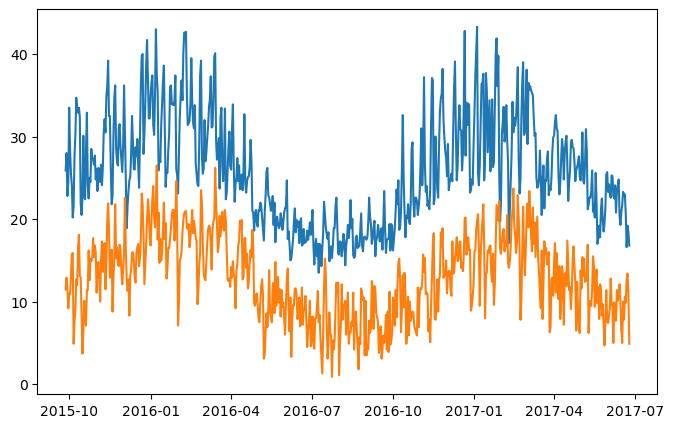

In [37]:
# Create a line chart of the maximum temperature over time using matplotlib function method

plt.plot(perth.Date, perth.MaxTemp)

# Create a line chart of the minimum temperature over time using matplotlib function method

plt.plot(perth.Date, perth.MinTemp)

# Adding a ";" to the end of the second plt.plot call suppresses information on the plot object...
# e.g., "[<matplotlib.lines.Line2D at 0x19b18a2e190>]
# Calling plt.plot() multiple times plots multiple charts in the same figure.

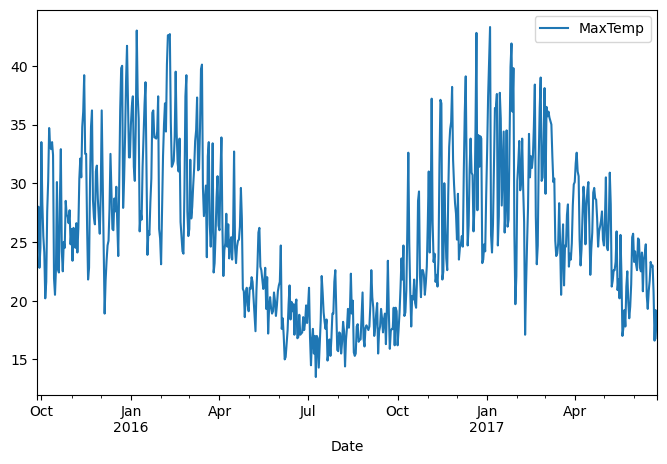

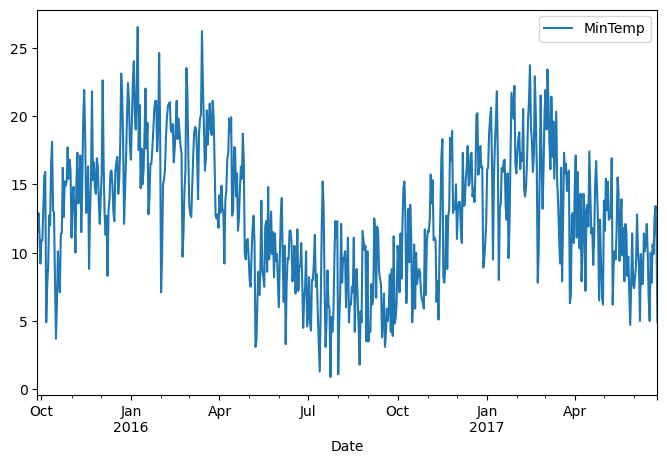

In [38]:
# Create a line chart from a pandas object
# dataframe.plot()
# Default is a line chart

perth.plot(kind="line", x="Date", y="MaxTemp")
perth.plot(kind="line", x="Date", y="MinTemp");

**Nota Bene:** Unlike matplotlib, calling the pandas object with .plot() creates two separate line charts. To plot two line charts in one graph from a pandas object...

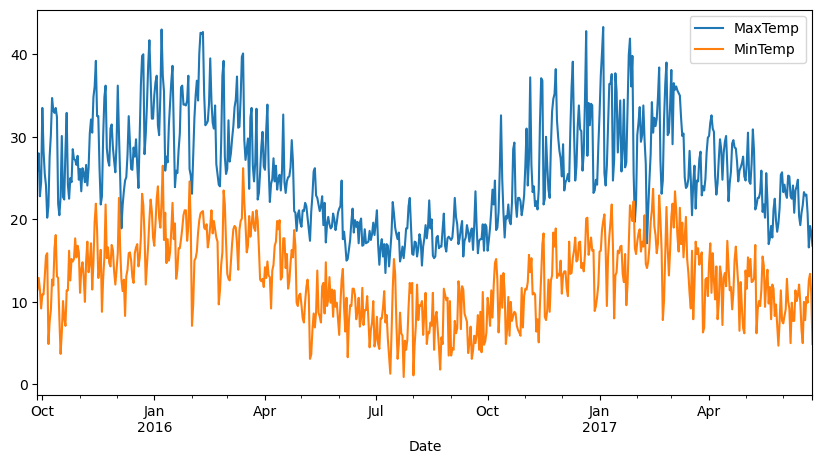

In [39]:
# Enclose both series data in square brackets 
# Can also adjust figure size with the parameter figsize=(width, height)

perth.plot(x="Date", y=["MaxTemp", "MinTemp"], figsize=(10,5));

Let's revisit the pandas object with two separate line charts. The x-axis values are the same, but the line charts do not share an x-axis. Use a combination of matplotlib object-oriented plotting and pandas to share the x-axis.

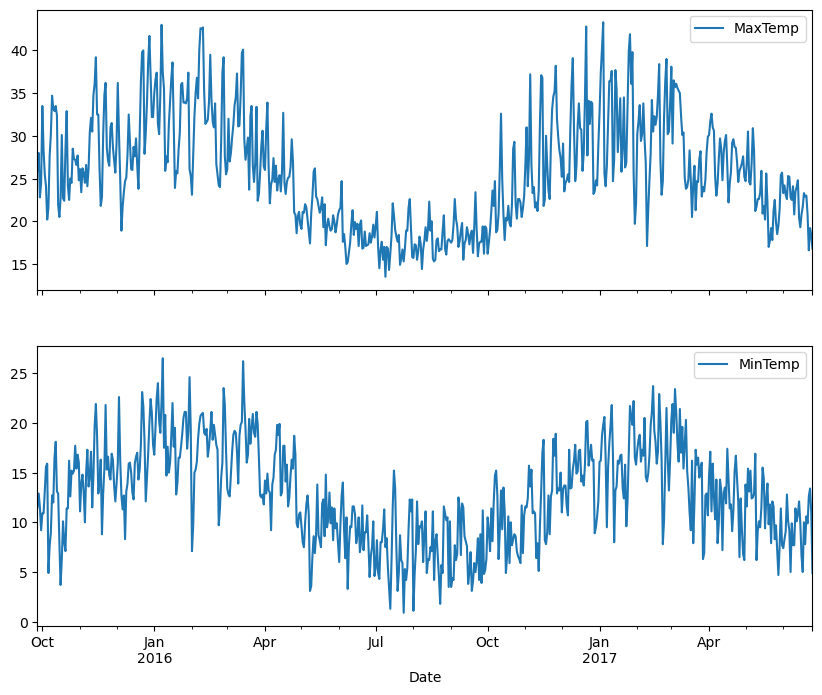

In [40]:
# Start by creating a blank figure and axes objects with dimensions (nrows, ncols)
# To share an x-axis, add parameter sharex="col"
# Adjust the figure size (10,6)

fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               sharex="col",
                               figsize=(10,8))

perth.plot(kind="line", x="Date", y="MaxTemp", ax=ax1)
perth.plot(kind="line", x="Date", y="MinTemp", ax=ax2);

Create the same graph (two subplots in one figure) with matplotlib object-oriented method

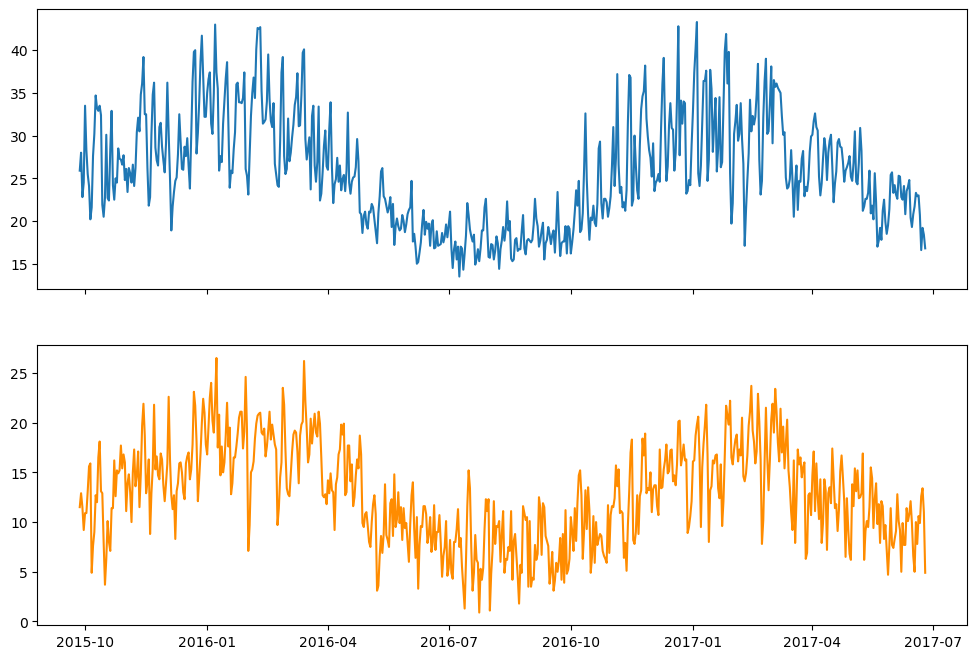

In [41]:
# Again, start by creating a blank figure and axes objects with dimensions (nrows, ncols)
# Add parameter sharex="col"
# Adjust the figure size
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               sharex="col", 
                               figsize=(12,8))

# Add the first line chart
ax1.plot(perth.Date, perth.MaxTemp)

# Add the second line chart
# Since second plot will default to blue, adjust the color with color="colorname"
ax2.plot(perth.Date, perth.MinTemp, color="darkorange")

Matplotlib supports a bevy of colors. https://matplotlib.org/stable/gallery/color/named_colors.html lists some of these colors.

#### Create bar graphs

In [42]:
# Load the student_dataset2.csv data into a pandas dataframe

student = pd.read_csv("data/student_dataset2.csv", skiprows=3)

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2747 non-null   int64  
 1   Major                      2747 non-null   object 
 2   HighSchoolGPA              2747 non-null   float64
 3   SATScores                  2747 non-null   int64  
 4   AppliedtoanotherUC         2747 non-null   object 
 5   AdmittedtoanotherUC        2747 non-null   object 
 6   FirstGeneration            2747 non-null   object 
 7   Gender                     2747 non-null   object 
 8   TotalHSHonorsCoursesTaken  2747 non-null   int64  
 9   MathPlacementScore         2747 non-null   int64  
 10  FirstMathClassGrade        2747 non-null   object 
 11  @1stSemesterGPA            2747 non-null   float64
 12  Retained1stYear            2747 non-null   object 
 13  Graduated                  2747 non-null   objec

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

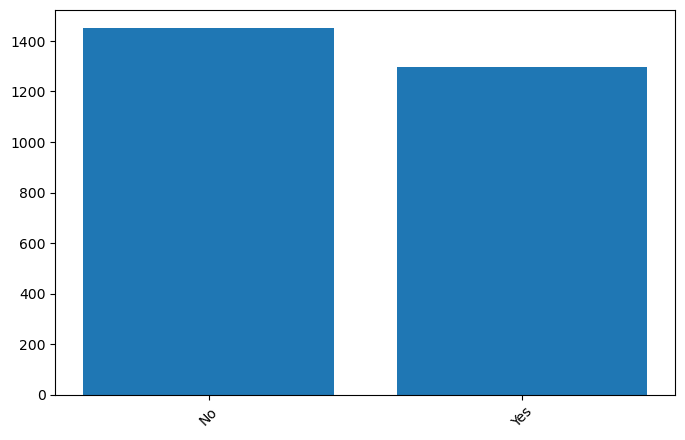

In [43]:
# Create a bar graph of student demographics from the data set using matplotlib's functional method
# Use value.counts() to return a count of "FirstGeneration" categories
student.FirstGeneration.value_counts()

# .value_counts() returns a series object, must access its index and values to create a bar graph
x = student.FirstGeneration.value_counts().index
y = student.FirstGeneration.value_counts().values

plt.bar(x, y)

# Notice how x-axis labels overlap. Can rotate x-axis labels by some number of degrees
plt.xticks(rotation=45)

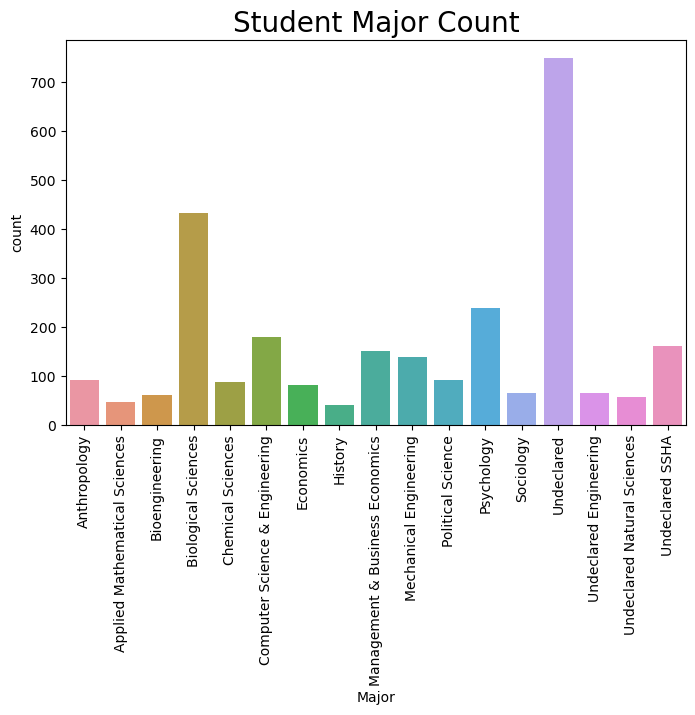

In [44]:
# Create the same bar graph using seaborn's .countplot()
sns.countplot(x="Major", data=student)

# Create a matplotlib axes object using seaborn
ax = sns.countplot(x="Major", data=student)
ax
# Add a title to bar graph and adjust the title font size
ax.set_title('Student Major Count', size=20)

# Rotate the x-axis labels by 90 degrees
ax.tick_params(axis='x', labelrotation=90)

<AxesSubplot:>

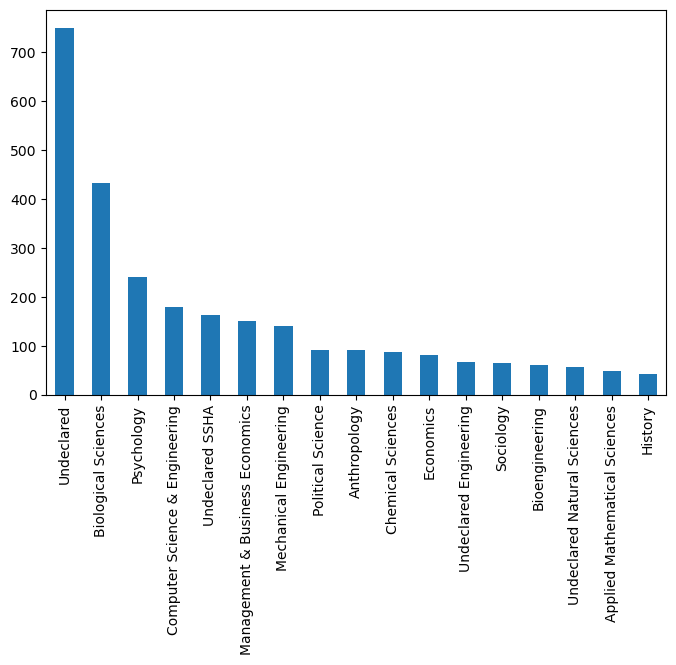

In [45]:
# Create the same bar graph from a pandas object
student.Major.value_counts().plot(kind="bar")

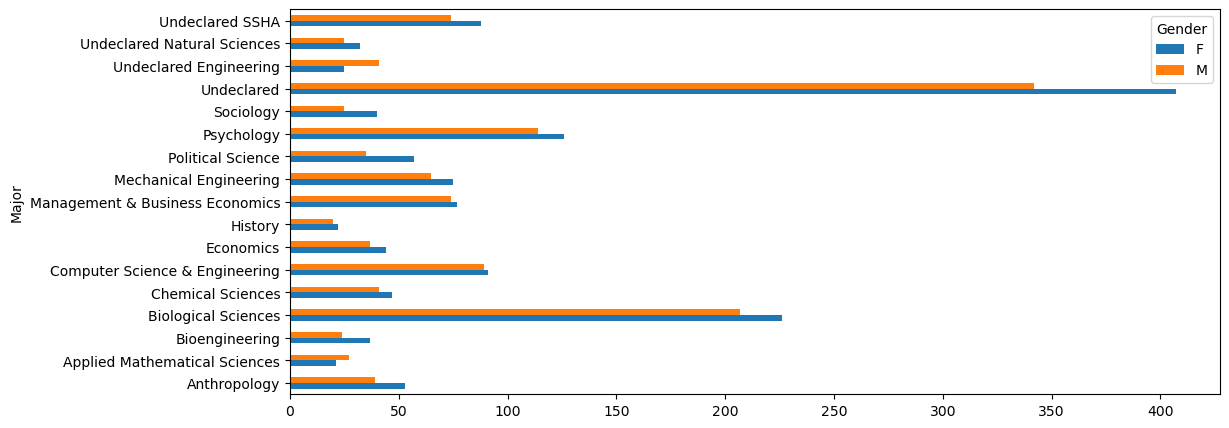

In [46]:
# Create the same bar graph from a pandas object factoring in gender
# By default, pd.crosstab() produces a multi-bar (multiple bar) chart
# kind="barh" produces a horizontal bar chart

pd.crosstab(student['Major'], student['Gender'])
pd.crosstab(student['Major'], student['Gender']).plot(kind='barh', figsize=(12,5));

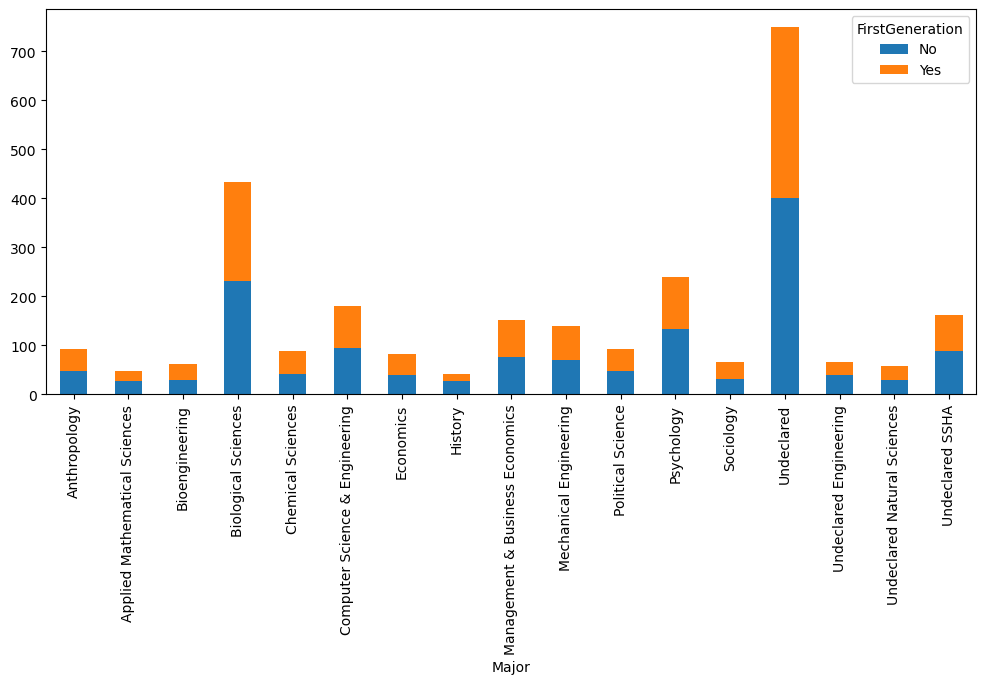

In [47]:
# Adding stacked=True produces a stacked bar chart

pd.crosstab(student['Major'], student['FirstGeneration']).plot(kind='bar', stacked=True, figsize=(12,5));

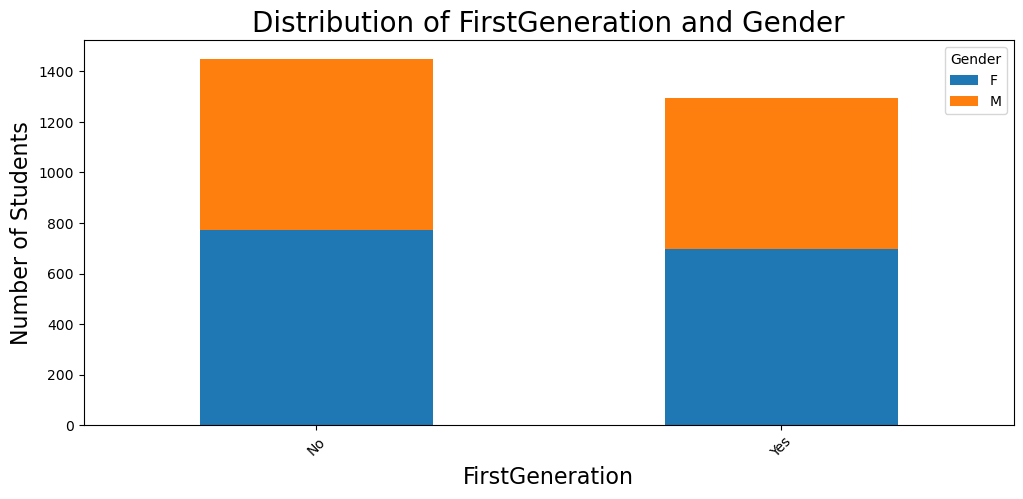

In [48]:
# Create a matplotlib axes object using pandas
ax = pd.crosstab(student['FirstGeneration'], student['Gender']).plot(kind='bar', stacked=True, figsize=(12,5))

# Add a title and adjust the font size of the title
ax.set_title("Distribution of FirstGeneration and Gender", fontsize=20)

# Add x-axis and y-axis labels to the bar chart and adjust their font sizes
ax.set_ylabel("Number of Students", fontsize=16)
ax.set_xlabel("FirstGeneration", fontsize=16)

# Rotate the x-axis labels by 45 degrees
ax.tick_params(axis='x', labelrotation=45)

#### Create pie charts

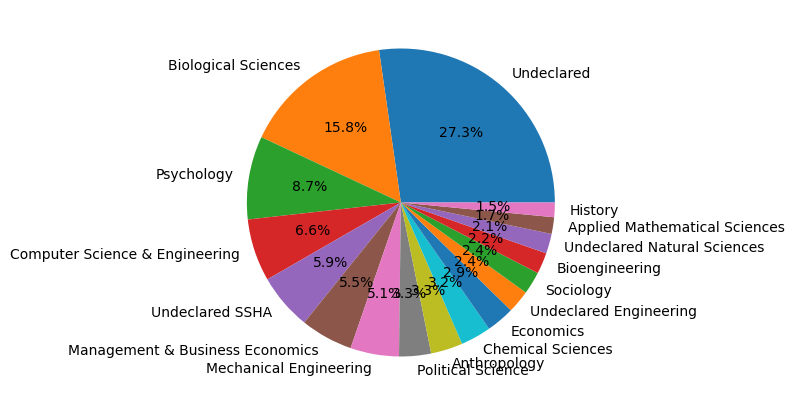

In [49]:
# Create a pie chart using matplotlib's functional method
# First, create a series object with index = "Major" and values = count

Major = student.Major.value_counts()

# Then create the pie chart with plt.pie(). Display the percent value for each piece of the pie
# using autopct= and Python string formatting to control number of digits displayed.

plt.pie(x=Major.values, labels=Major.index, autopct="%.1f%%");

<AxesSubplot:ylabel='Major'>

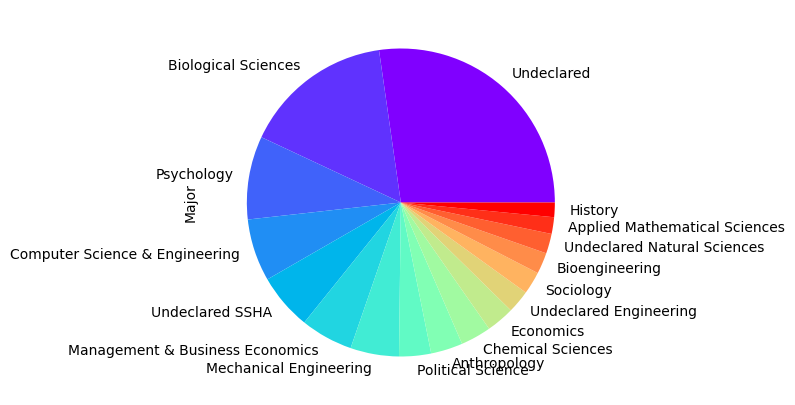

In [50]:
# Create a pie chart from the pandas series object, Major, from above.
# Change the color scheme of the pie chart

Major.plot(kind="pie", cmap="rainbow")

For more on using colormaps and the colormaps supported by Matplotlib, go to https://matplotlib.org/stable/tutorials/colors/colormaps.html.

#### Create histograms

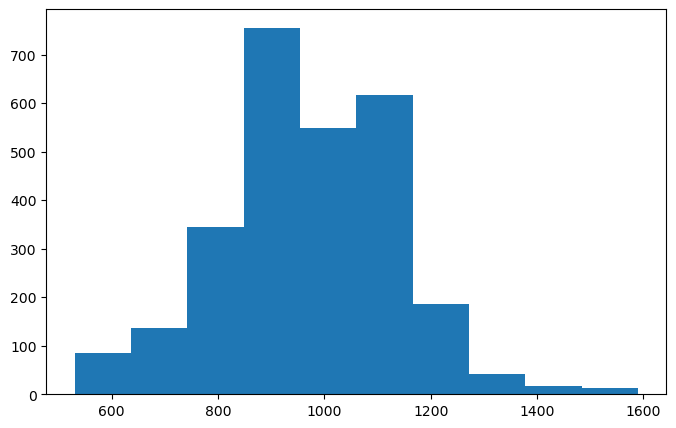

In [51]:
# Create a histogram of SATScores using matplotlib.

plt.hist(student.SATScores);

array([[<AxesSubplot:title={'center':'SATScores'}>]], dtype=object)

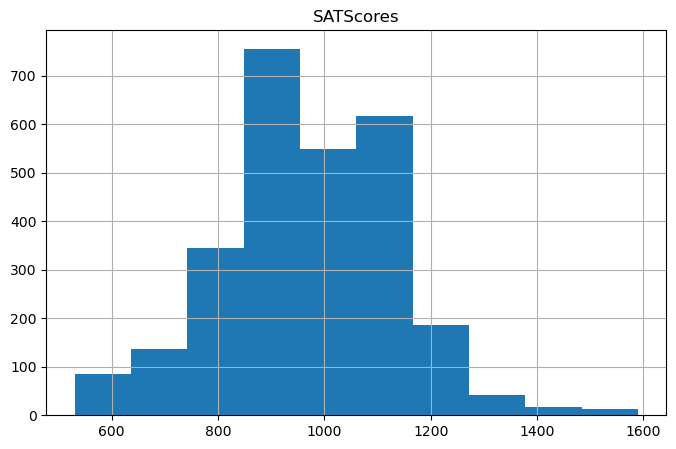

In [52]:
# Create a histogram of SATScores from the pandas dataframe object, student

student.hist(column="SATScores")

Text(0.5, 1.0, 'Histogram of Student SAT Scores')

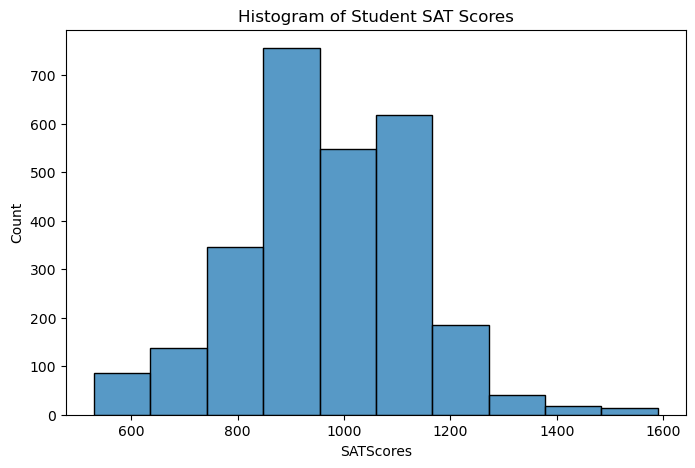

In [53]:
# Create a histogram of SATScores using seaborn. Change the bin size and add a title

sns.histplot(data=student, x="SATScores", bins=10).set_title("Histogram of Student SAT Scores")

#### Create scatter plots

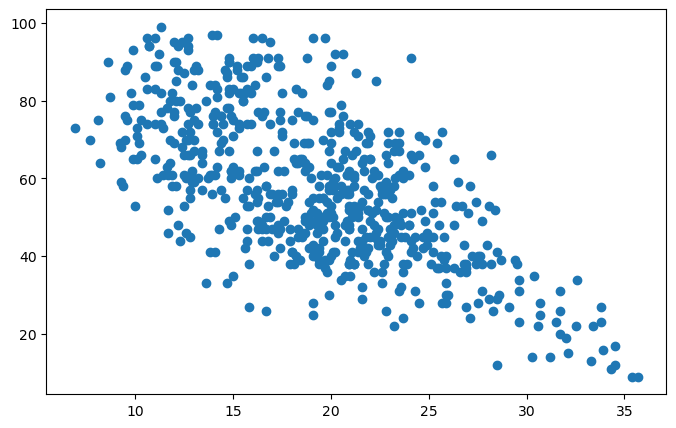

In [54]:
# Create a scatter plot of the Temperature versus Humidity at 9am in the perth dataframe using matplotlib

plt.scatter(x=perth.Temp9am, y=perth.Humidity9am);

<AxesSubplot:xlabel='Temp9am', ylabel='Humidity9am'>

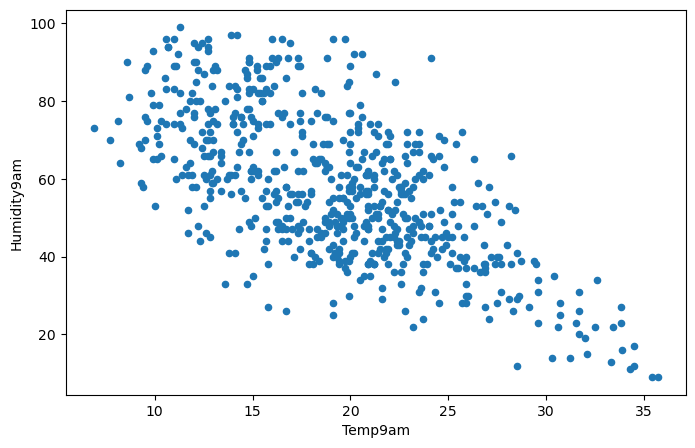

In [55]:
# Create a scatter plot of the Temperature versus Humidity at 9am from the pandas object, perth

perth.plot.scatter(x="Temp9am", y="Humidity9am")

<AxesSubplot:xlabel='Temp9am', ylabel='Humidity9am'>

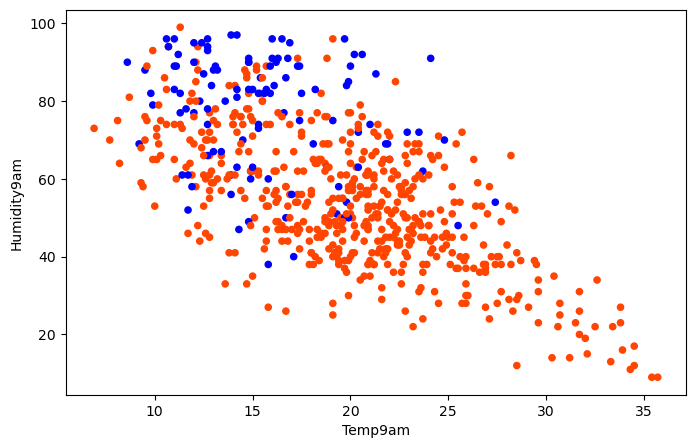

In [56]:
# Create a scatter plot from the pandas object, but color code the points according to whether it rained that day

colors ={"Yes": "blue", "No": "orangered"}
perth["colors"] = perth.RainToday.map(colors)

perth.plot.scatter(x="Temp9am", y="Humidity9am", color=perth["colors"])

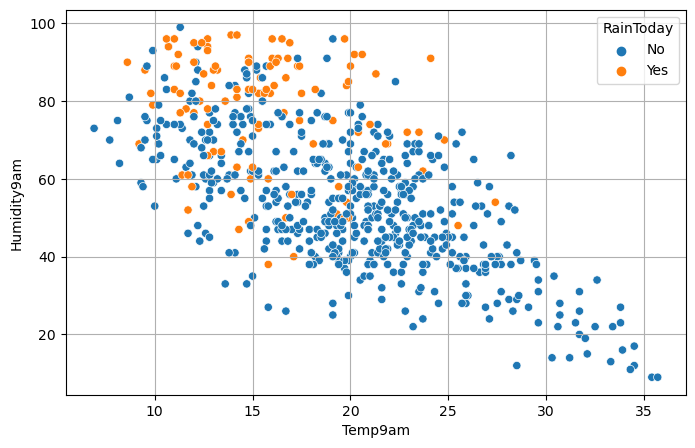

In [57]:
# Create a color-coded scatter plot using seaborn and add a grid

sns.scatterplot(x="Temp9am", y="Humidity9am", data=perth, hue="RainToday").grid()

Text(31, 74, '2016-01-24, 27.4 deg C')

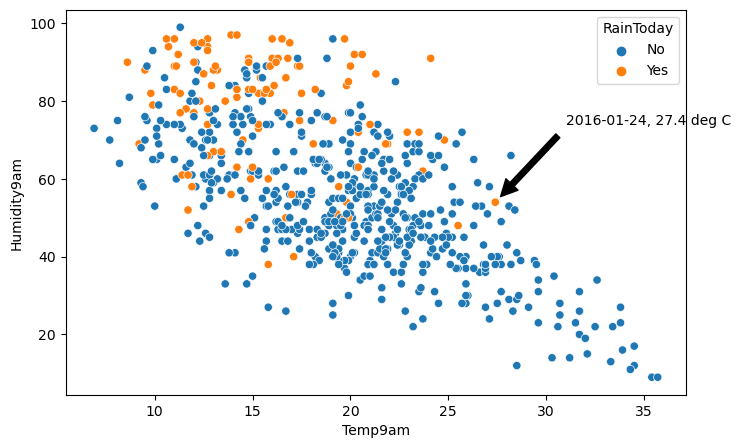

In [58]:
# Annotate the seaborn scatterplot to identify the date with the highest temperature at 9 AM
# on a day in which it also rained

# First, identify the date in which it rained, its highest temperature and the humidity.
perth[perth.RainToday == "Yes"].Temp9am.max()
perth[perth.Temp9am == 27.4]

# Create the plot and assign it to a variable
ax = sns.scatterplot(x="Temp9am", y="Humidity9am", data=perth, hue="RainToday")

# Annotate the point
ax.annotate("2016-01-24, 27.4 deg C",
            xy=(27.4, 54),
            xytext=(31, 74), 
            arrowprops=(dict(facecolor="black", shrink=0.075)))

#### Create scatter matrices

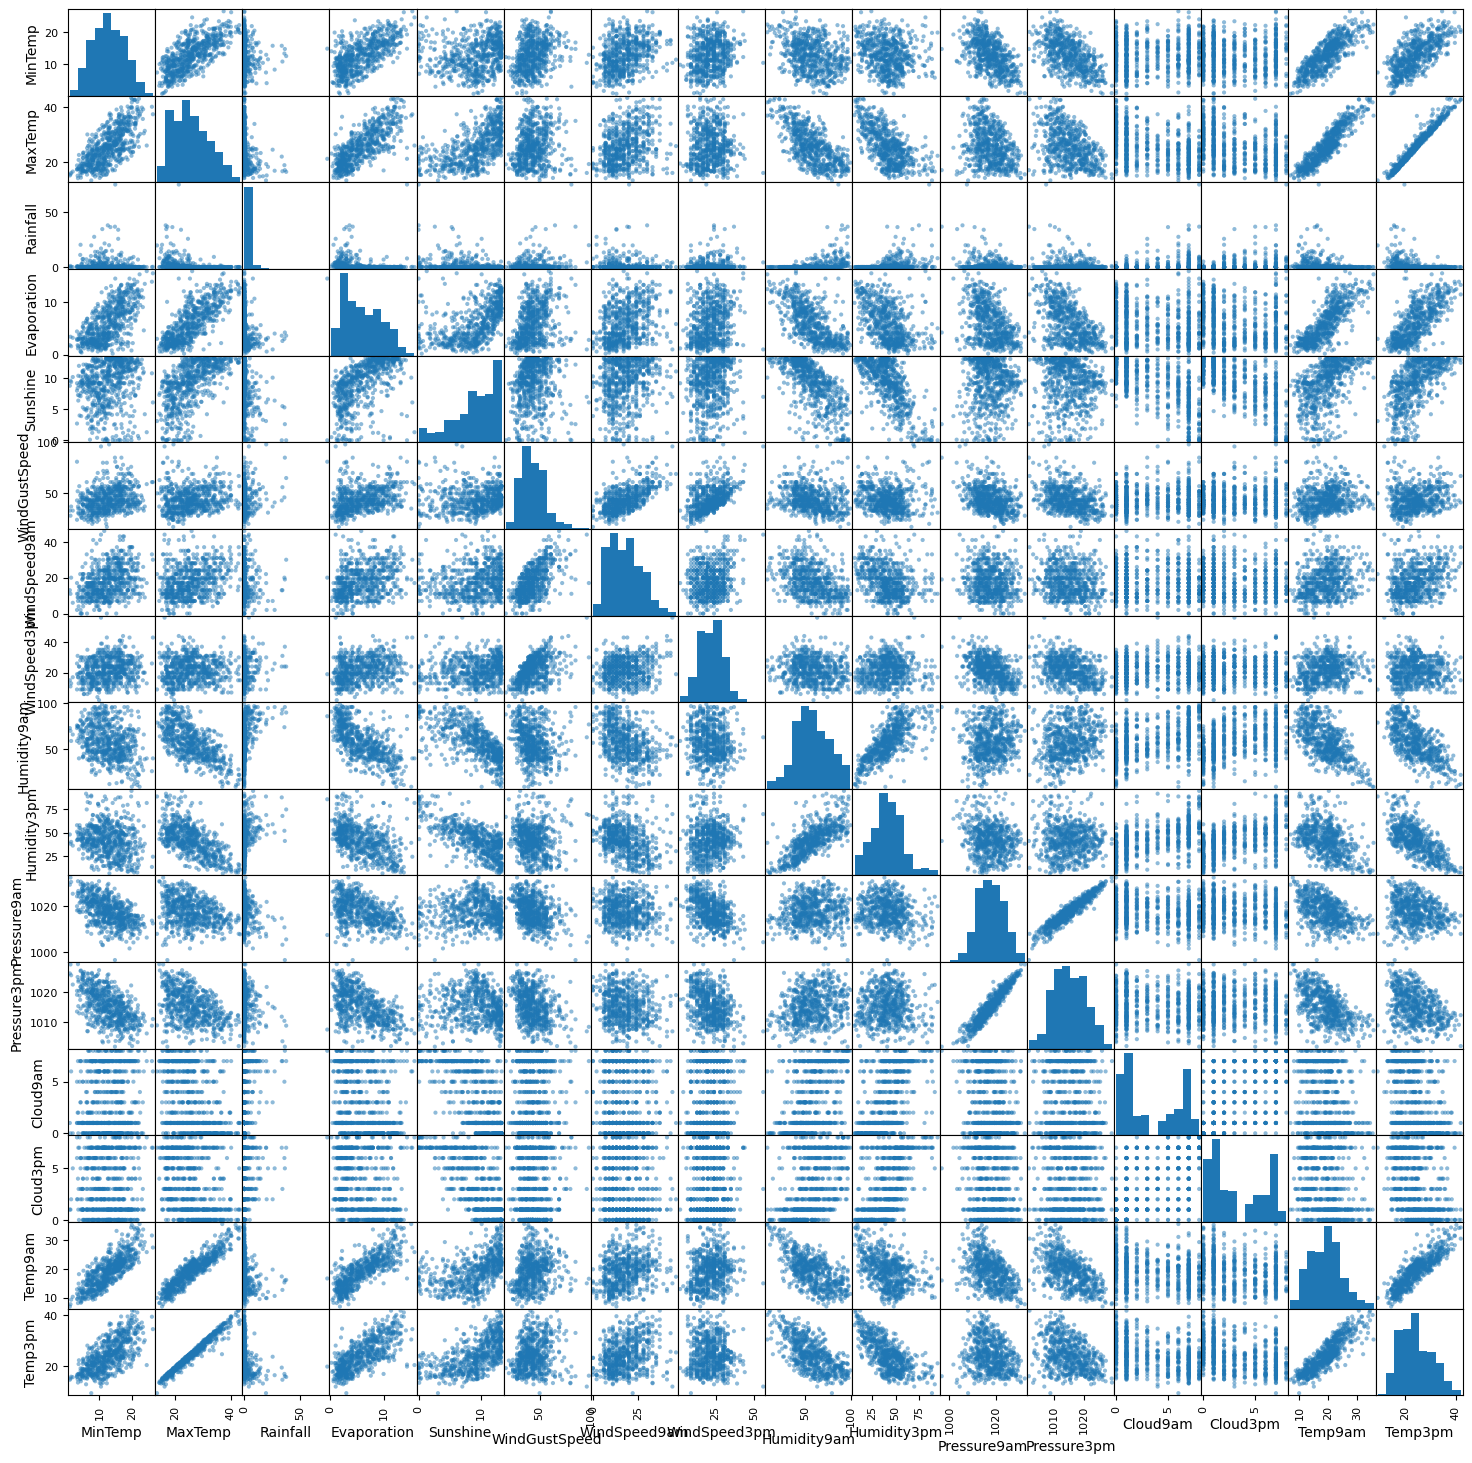

In [59]:
# Create a scatter matrix from the pandas object, perth and adjust the figure size

pd.plotting.scatter_matrix(perth, figsize=(18,18));

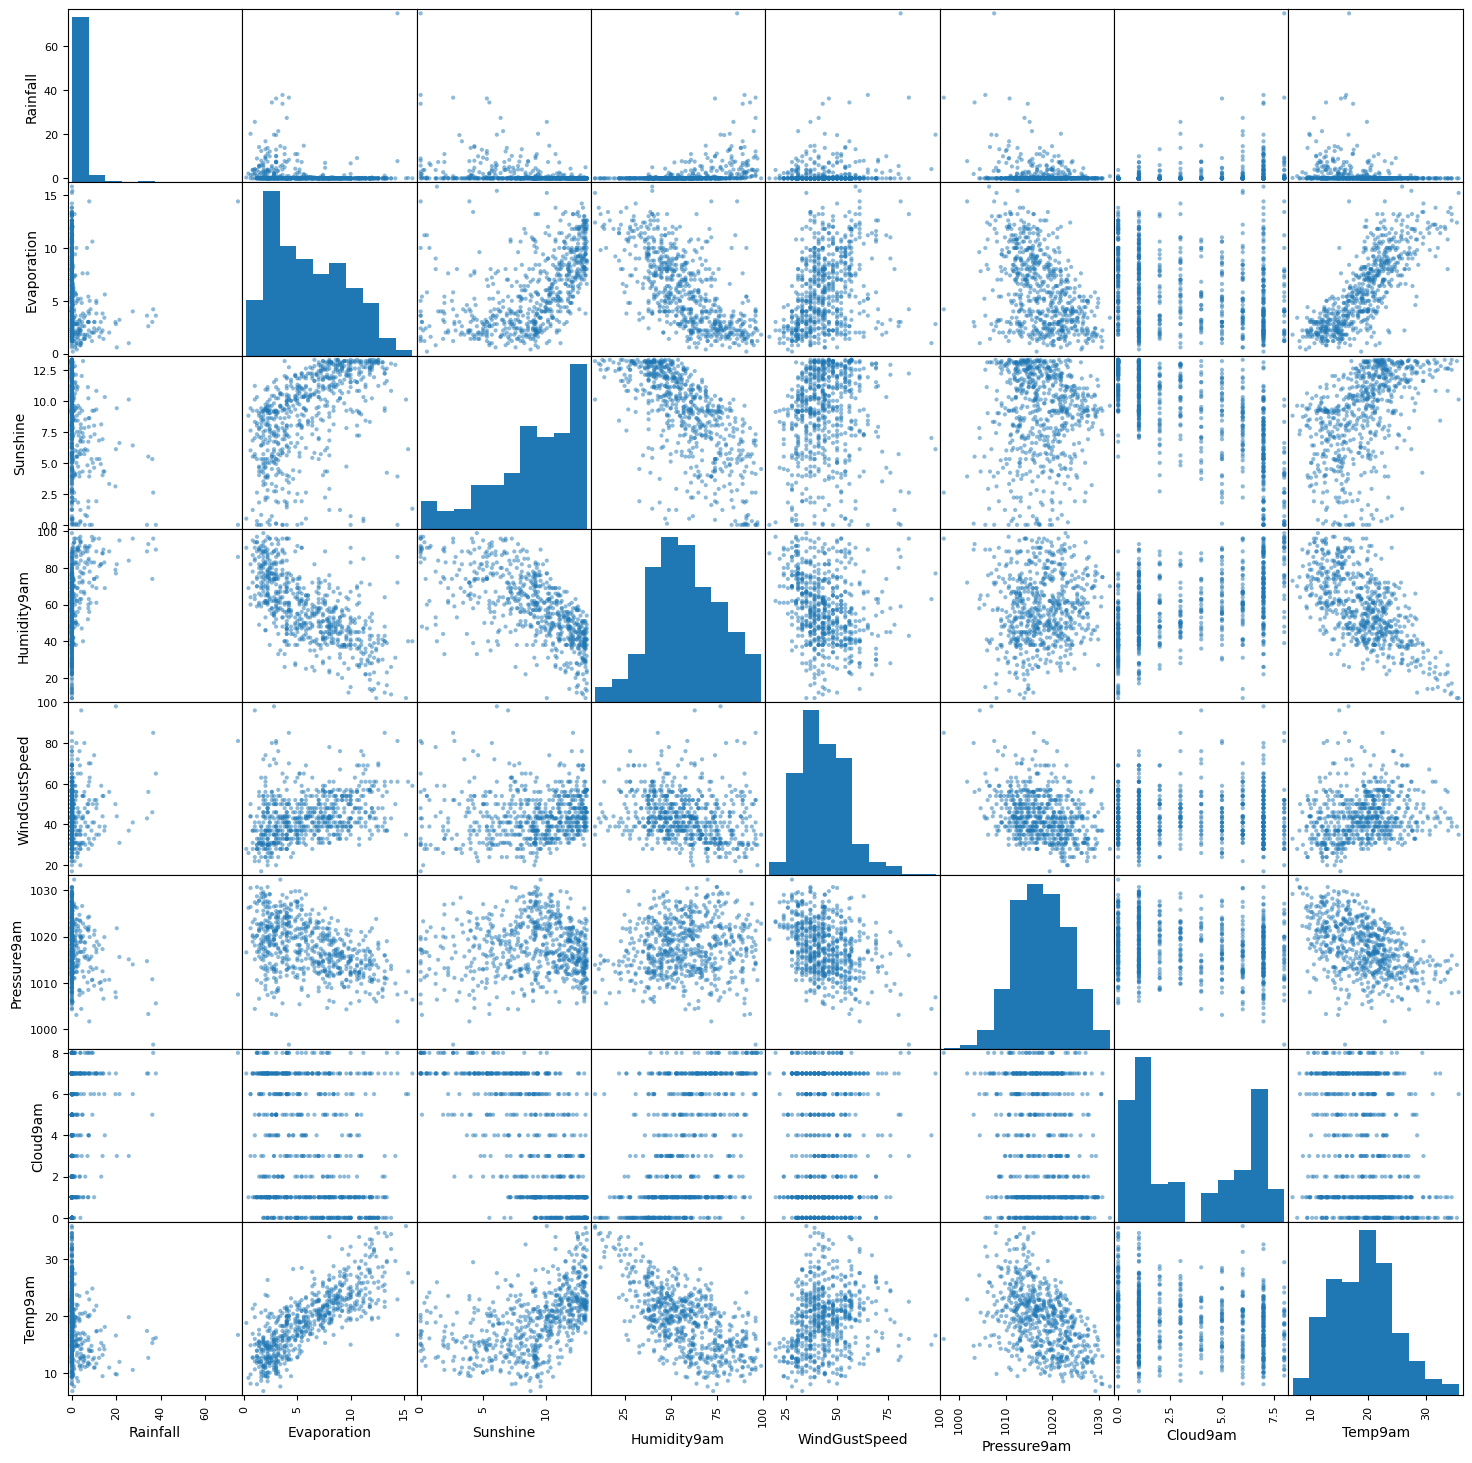

In [60]:
# That was alot to take in...
# Create a smaller scatter matrix from the pandas object, perth, by subsetting for some of
# the features in the dataframe

pd.plotting.scatter_matrix(perth[['Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 
                                  'WindGustSpeed','Pressure9am', 'Cloud9am', 'Temp9am']], figsize=(18,18));

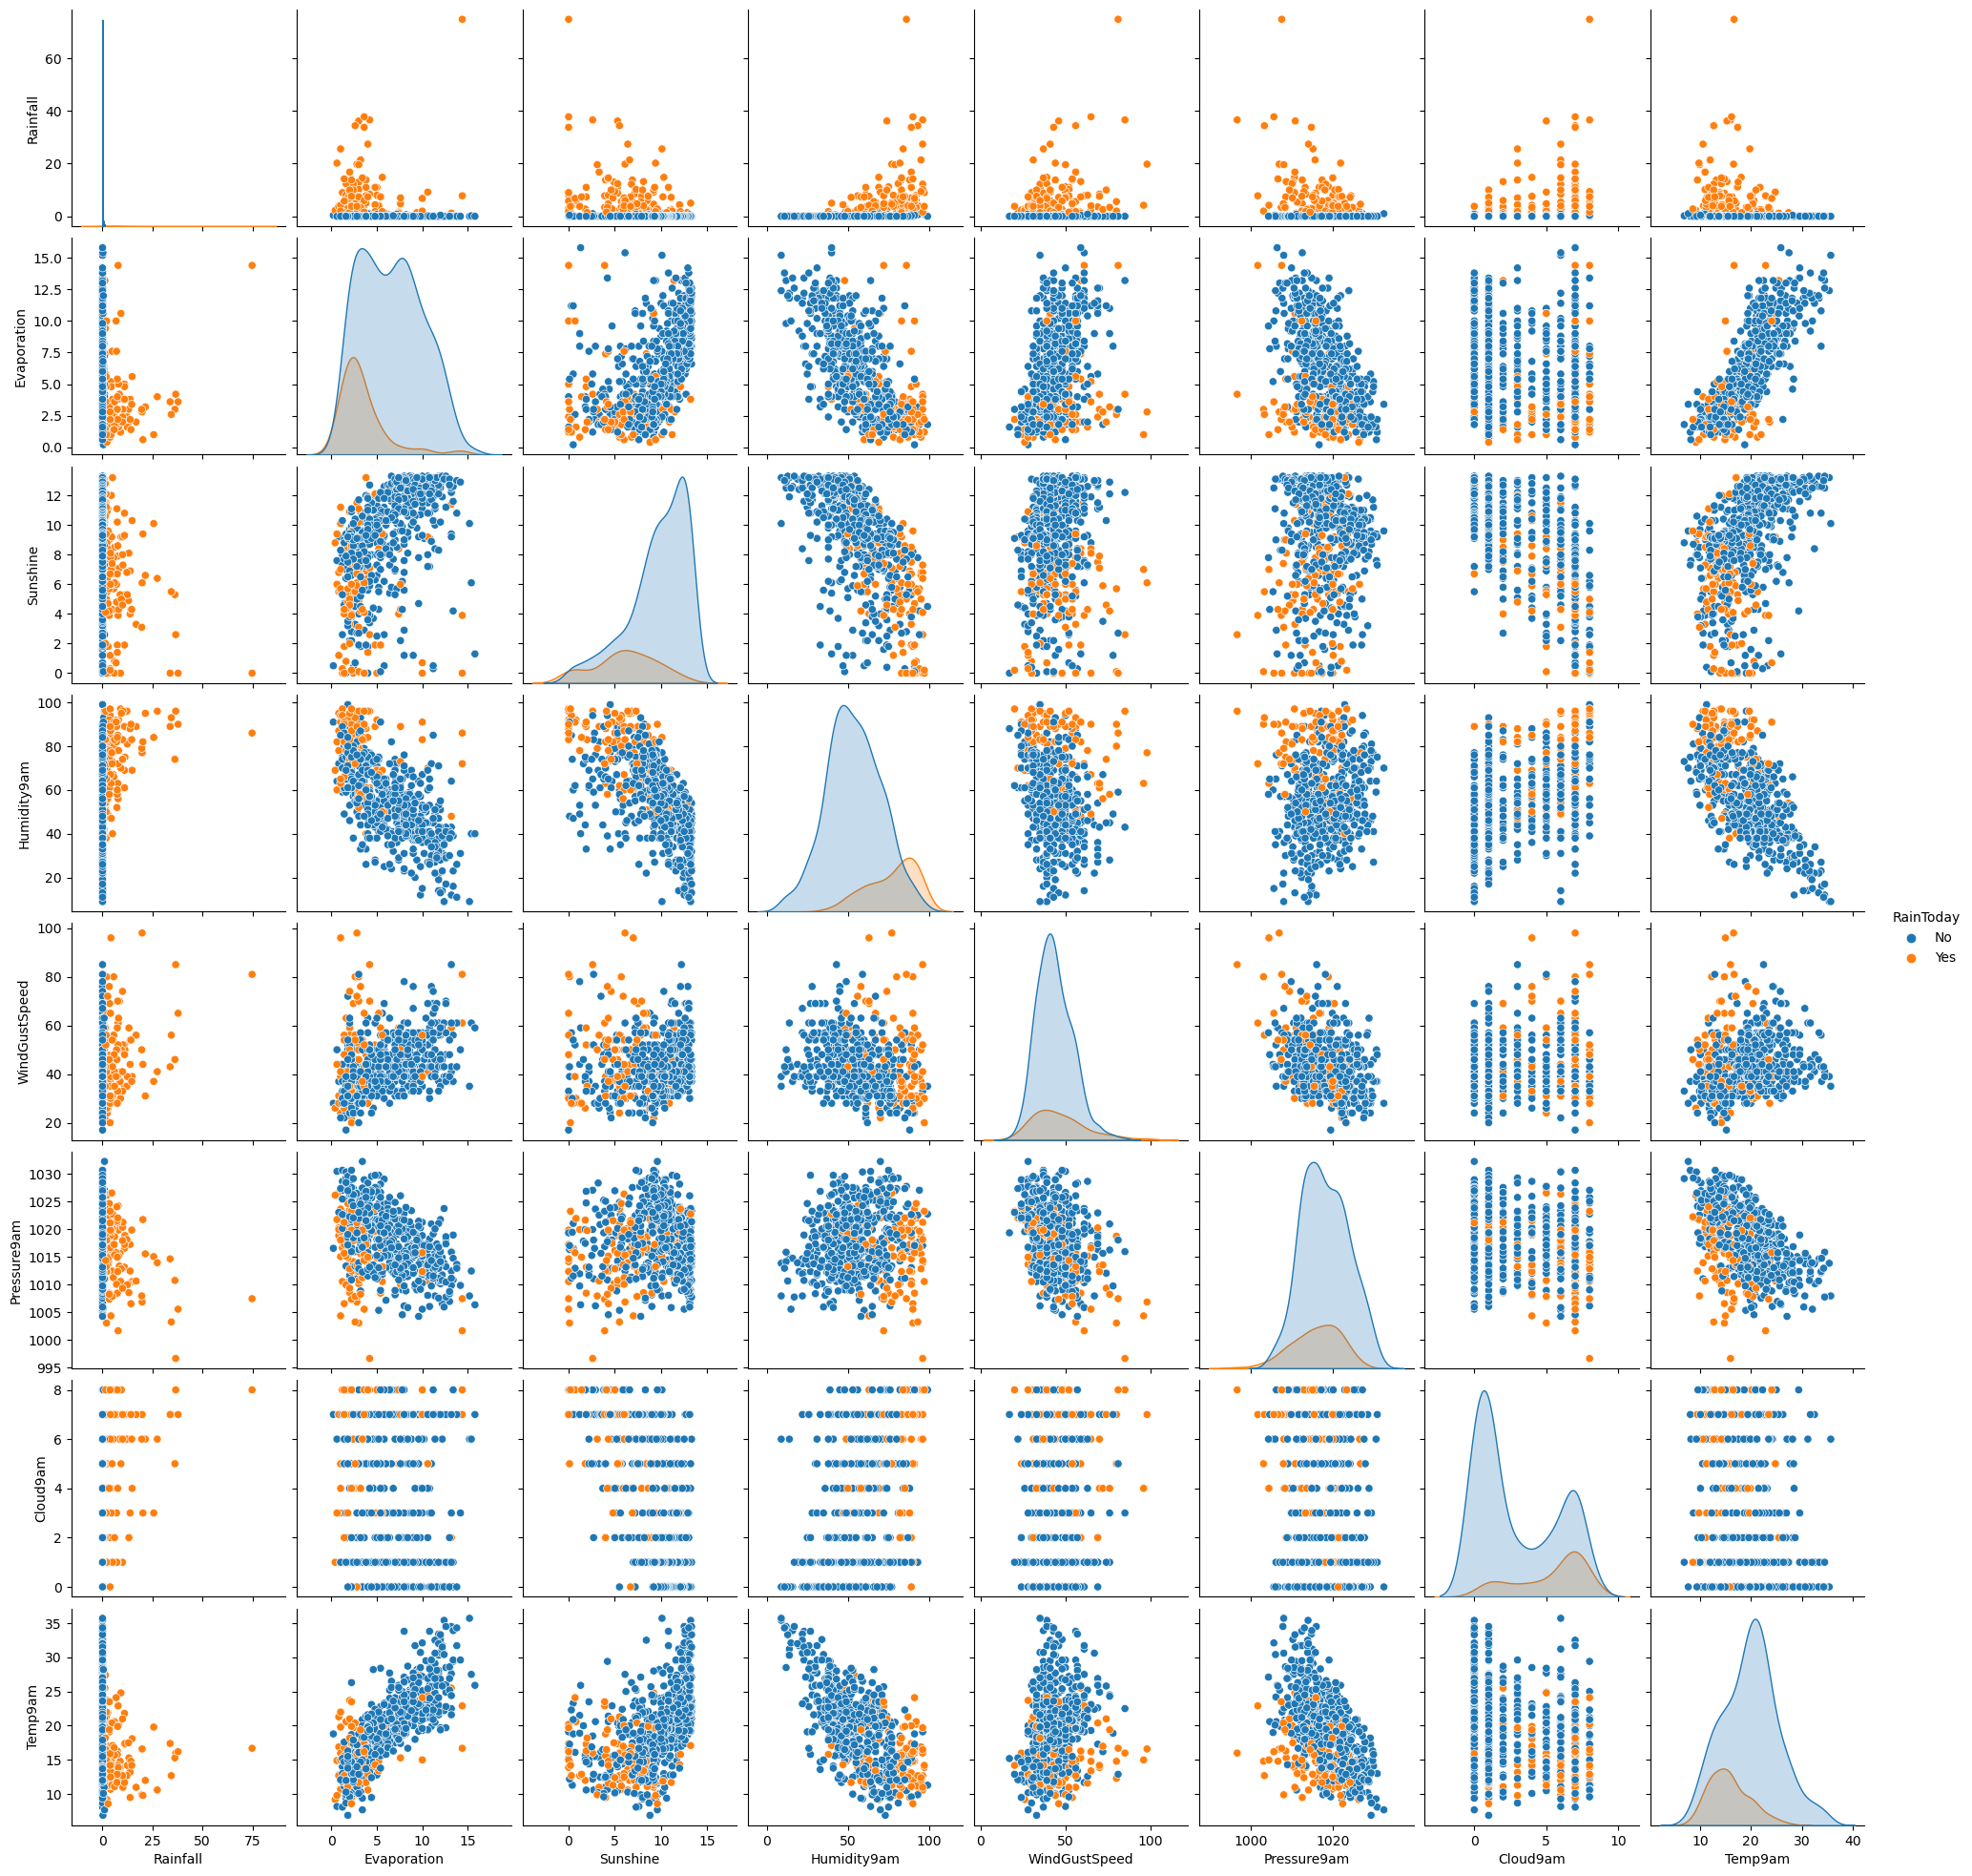

In [61]:
# Create the smaller scatter matrix using seaborn then color code points according to whether it rained that day

subset = perth[['Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 
                                  'WindGustSpeed','Pressure9am', 'Cloud9am', 'Temp9am', 'RainToday']]

sns.pairplot(subset, hue="RainToday")

#### Create a heatmap using seaborn

<AxesSubplot:>

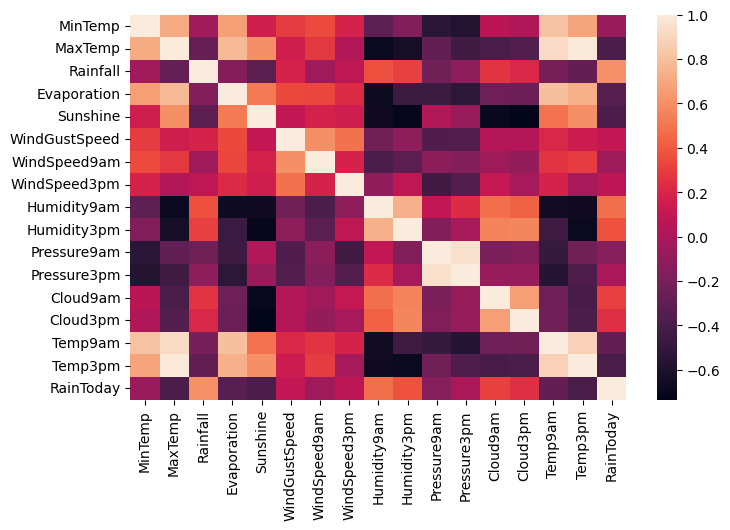

In [62]:
# Create a correlation heat map using seaborn
# Replace Yes, No data points in the RainToday column with 1, 0, respectively
perth.replace(["Yes", "No"], [1, 0], inplace=True)

# Select for columns with numerical data types and drop the date column
perth_num = perth.select_dtypes(exclude=['object', 'datetime64[ns]'])
perth_num.head()

# Compute pairwise correlation of remaining numerical columns
corr = perth_num.corr()
corr.head()

# Plot the correlation heat map
sns.heatmap(corr)

#### Export dataframe and figures

In [63]:
student_subset = student[['ID', 'Major', 'Graduated']]

# Export dataframe into a csv file
student_subset.to_csv('data/student_records.csv')

In [64]:
# Export dataframe into Excel
student_subset.to_excel('data/records.xlsx')

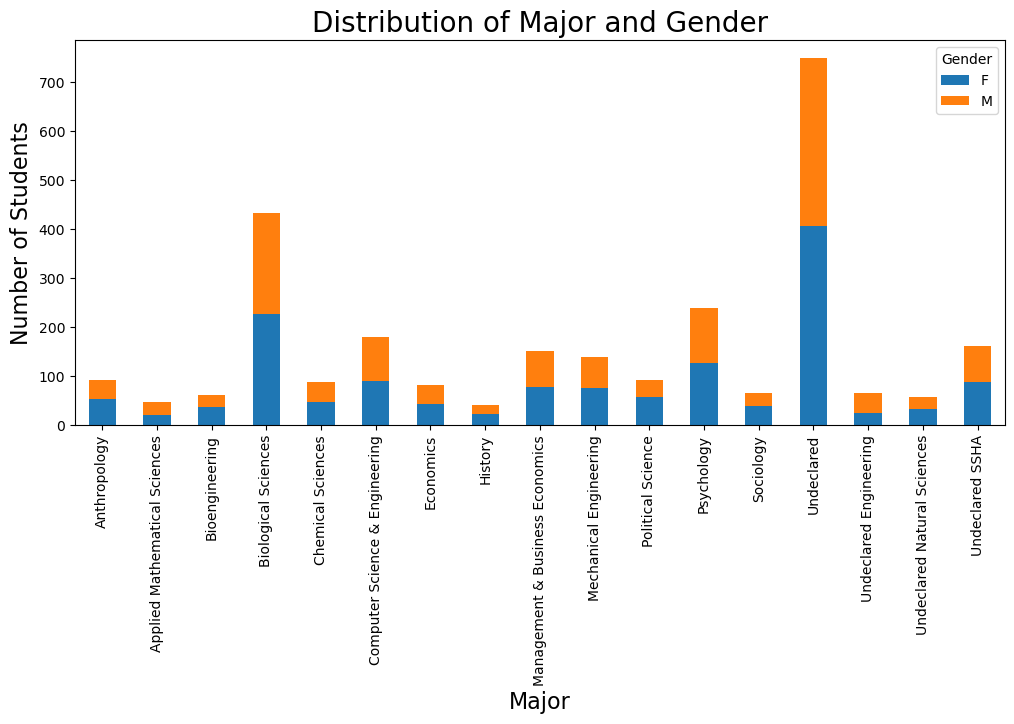

In [65]:
# Save a figure. 
# Use the seaborn scatter matrix of the pandas dataframe
ax = pd.crosstab(student['Major'], student['Gender']).plot(kind='bar', stacked=True, figsize=(12,5))

ax.set_title("Distribution of Major and Gender", fontsize=20)

ax.set_ylabel("Number of Students", fontsize=16)
ax.set_xlabel("Major", fontsize=16)

ax.tick_params(axis='x', labelrotation=90)

plt.savefig("img/my_bar_chart.png")

## Data Visualization Mini-Challenges

Using the olympics dataset from above:

Drop all rows containing null values using df.dropna() and assign the results to a new variable.
1. Create a histogram of the medals achieved by male athletes in the United States according to their age.
2. Use pandas and matplotlib to plot athlete weight versus height.
3. Use seaborn to create a scatter plot of athlete weight versus height and color code the data according to gender.
4. Create a line plot of the medals won per year the Olympics were held.

In [66]:
# Load the csv file, medalists.csv if you haven't done so already. 
# Don't forget to skip the first 4 rows.

# Enter your code here



In [67]:
# Drop all rows containing null values using df.dropna()

# Enter your code here



In [68]:
# 1. Create a histogram of the medals achieved by male athletes in the United States according to age.

# Enter your code here


In [69]:
# 2. Use matplotlib to plot athlete weight versus height

# Enter your code here



# 2. Use pandas to plot athlete weight versus height

# Enter your code here



In [70]:
# 3. Use seaborn to create a scatter plot of athlete weight versus height and color code the data according to gender

# Enter your code here



In [71]:
# 4. Create a line plot of the medals won per year the Olympics were held.
# First obtain the medal count according to year

# Enter your code here


In [72]:
# 4. Create a line plot of the medals won per year the Olympics were held.

# Enter your code here



# Remember that value_counts sorts descending according to the series data. In this case, it
# sorts according to number of medals won and not event year, that's why plot looks strange.
# Sort the line plot according to year which is the index of the series

# Enter your code here



# Plot looks much better when the data is sorted according to the index, or year.

# Enter your code here
